<a href="https://colab.research.google.com/github/Harisjauhar/Pemprograman_python/blob/main/TUGAS13PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Mendefinisikan fungsi perhitungan path loss COST 231 
#Menggunakan parameter jarak, frekuensi,tipe area, tinggi antena pemancar dan penerima

def pathlossmod(d, fc, area, pem, pen):
  
  #Mengsinkronisasi variabel c1 dan c2 terhadap fc

  if fc in range(150,1501):
    c1 = 69.55
    c2 = 26.16
  elif fc in range(1501,2001):
    c1 = 46.3
    c2 = 33.9

  #Menentukan area yang diinginkan

  if (area == "Urban"): #Daerah Urban
    Cm = 0
  elif (area == "Suburban"): #Daerah Suburban
    Cm = -2*((np.log10((fc/28)**2))-5.4)
  elif (area == "Open"): #Daerah Open
    Cm = -4.78*(np.log10(fc))+18.33*(np.log10(fc))-40.94

  #Perumusan kalkulasi

  apen = (1.1*np.log10(fc) - 0.7)*pen - (1.56*np.log10(fc) - 1.8)
  losspath = c1 + (c2*np.log10(fc)) - (13.83*np.log10(pem)) - apen + ((44.9-6.55*np.log10(pem))*np.log(d)) - Cm
  return losspath

In [3]:
#Assign variable yang sudah di tentukan
tingtower = 80      #meter
tinguser = 1.5      #meter
dmax = 700          #meter
dmin = 200          #meter
n = 200             #user
loc1 = "Urban"
loc2 = "Suburban"
loc3 = "Open"
f1 = 1800           #Mhz
f2 = 900            #Mhz
f3 = 700            #Mhz

#Memasukan data random dari yang bernilai 200 hingga 700 dan berjumlah 200 buah integer
dran=np.random.randint(dmin,dmax,n)

In [4]:
#Memanggil fungsi kalkulasi dengan variabel yang sudah di tentukan

#1
lpUrban = pathlossmod(dran,f1,loc1,tingtower,tinguser)
lpSuburban = pathlossmod(dran,f1,loc2,tingtower,tinguser)
lpOpen = pathlossmod(dran,f1,loc3,tingtower,tinguser)

#2
lpUrban2 = pathlossmod(dran,f2,loc1,tingtower,tinguser)
lpUrban3 = pathlossmod(dran,f3,loc1,tingtower,tinguser)

In [5]:
#Melakukan sorting data supaya data yang di visualisasikan keluar dengan rapi

#Sorting Jarak
sortingdran=dran[np.argsort(dran)]

#Sorting data arahan 1
sortingUrban=lpUrban[np.argsort(dran)]
sortingSuburban=lpSuburban[np.argsort(dran)]
sortingOpen=lpOpen[np.argsort(dran)]

#Sorting data arahan 2
sortingUrban2=lpUrban2[np.argsort(dran)]
sortingUrban3=lpUrban3[np.argsort(dran)]

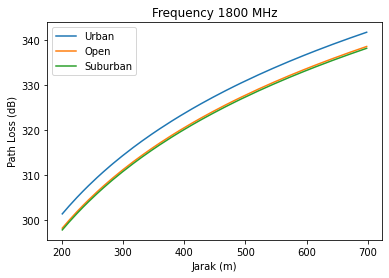

In [6]:
#Memvisualisasikan data menggunakan grafik
#path loss pada frekuensi 1800 Mhz terhadap 3 lokasi yaitu urban, suburban, dan open

plt.figure()
plt.title("Frequency 1800 MHz")
plt.plot(sortingdran,sortingUrban, label = "Urban")
plt.plot(sortingdran,sortingOpen, label = "Open")
plt.plot(sortingdran,sortingSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.show()

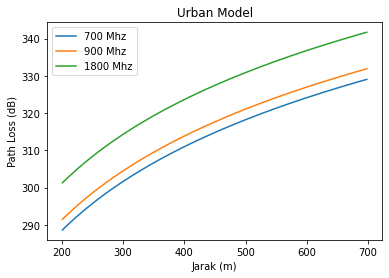

In [7]:
#Memvisualisasikan data menggunakan grafik
#path loss pada lokasi yang sama (Urban) terhadap 3 frekuensi yang berbeda (700 Mhz, 900 Mhz, 1800 Mhz)

plt.figure()
plt.title("Urban Model")
plt.plot(sortingdran,sortingUrban3, label = "700 Mhz")
plt.plot(sortingdran,sortingUrban2, label = "900 Mhz")
plt.plot(sortingdran,sortingUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.show()

Haris jauhar ansori(1101190380)